# Make Jupyter even more magical

## (with cell magic extensions!)

### by Nicolas Kruchten, from Datacratic

<img src="http://nicolas.kruchten.com/datacratic.png" width="200" />

* Datacratic is Democratizing Machine Learning through the Machine Learning Database (http://mldb.ai/)
* Based in Montreal, founded in 2010, venture-funded, 30 employees
* Jupyter is shipped as part of MLDB as the main interface

<br/><br/><br/><br/><br/>

## Intro to Jupyter

First things first, you can run Python code in Jupyter.

In [29]:
print "Hello, world!"

Hello, world!


Objects and functions stick around from cell to cell: I can define a function here...

In [30]:
def do_stuff():
    print "Hello again!"

...and call it there.

In [31]:
do_stuff()

Hello again!


Inspecting objects is easy too.

In [4]:
import requests
requests?

## Markdown cells

This is a Markdown cell.

* this is a list item
* and another

<br/><br/><br/><br/><br/>

## Time for some Magic!

Lines and cells that start with `%` are not interpreted like normal Python code: they are magical. Let's try a simple one first which will show us what magic is available.

In [32]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hierarchy  %hist  %history  %http  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %sql  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%dot  %%file  %

In [33]:
%ls

code_to_paste.txt          pivottablejs.html
jupyter_magic.ipynb        sample_ext.py
jupyter_magic.slides.html  sample_ext.pyc
mps.csv


In [34]:
%time print "Do you have the time?"

Do you have the time?
CPU times: user 34 µs, sys: 5 µs, total: 39 µs
Wall time: 37.9 µs


In [35]:
%%timeit
x = 0
for i in xrange(10): x += i

The slowest run took 4.75 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 653 ns per loop


In [36]:
%%bash

curl http://localhost:5000/get

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Content-Length": "", 
    "Content-Type": "", 
    "Host": "localhost:5000", 
    "User-Agent": "curl/7.43.0"
  }, 
  "origin": "127.0.0.1", 
  "url": "http://localhost:5000/get"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   240  100   240    0     0  34517      0 --:--:-- --:--:-- --:--:-- 40000


## First big idea of this talk: Jupyter cells are not just for Python!

<br/><br/><br/><br/><br/>

## Third-party Magic

Those were all built-in magics, but we can install and load third-party magic extensions too.

In [37]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [38]:
%sql sqlite://

'Connected: None@None'

In [39]:
%%sql

DROP TABLE IF EXISTS hockey;
CREATE TABLE hockey ("Team", "Stanley Cups Won", "Country");
INSERT INTO hockey VALUES ("Montreal Canadiens", 24, "Canada");
INSERT INTO hockey VALUES ("Detroit Red Wings", 11, "USA");
INSERT INTO hockey VALUES ("Boston Bruins", 6, "USA");
INSERT INTO hockey VALUES ("Chicago Blackhawks", 11, "USA");
INSERT INTO hockey VALUES ("Toronto Maple Leafs", 13, "Canada");

Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [40]:
%sql SELECT * FROM hockey ORDER BY "Stanley Cups Won" DESC LIMIT 3

Done.


Team,Stanley Cups Won,Country
Montreal Canadiens,24,Canada
Toronto Maple Leafs,13,Canada
Detroit Red Wings,11,USA


Whoa, what happened there? That's not text, that's HTML!

The answer is that when displaying an object, Jupyter tries to get an HTML representation of that object from a method called `_repr_html_` if it exists. Any object with such a method gets displayed this way.

In [41]:
class Thing():
    def _repr_html_(self):
        return """<h3 style="color: blue; text-align: center;">I am a blue thing</h3><br/>"""

thing = Thing()
thing

<__main__.Thing instance at 0x10e8a1d88>

## Second big idea of this talk: `_repr_html_()` to control Notebook output

<br/><br/><br/><br/><br/>

## Going visual with Matplotlib

The `matplotlib` cell magic lets us tell Jupyter we want to see charts inline with the notebook.

In [42]:
%matplotlib inline

We can also capture the output of a cell magic and assign it to a variable, like so.

Done.


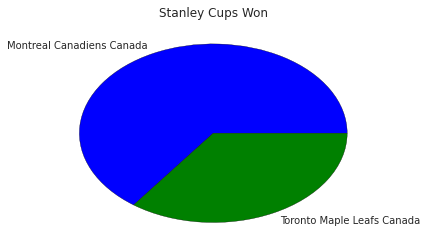

In [43]:
data = %sql SELECT * FROM hockey WHERE country='Canada' 

data.pie()
None

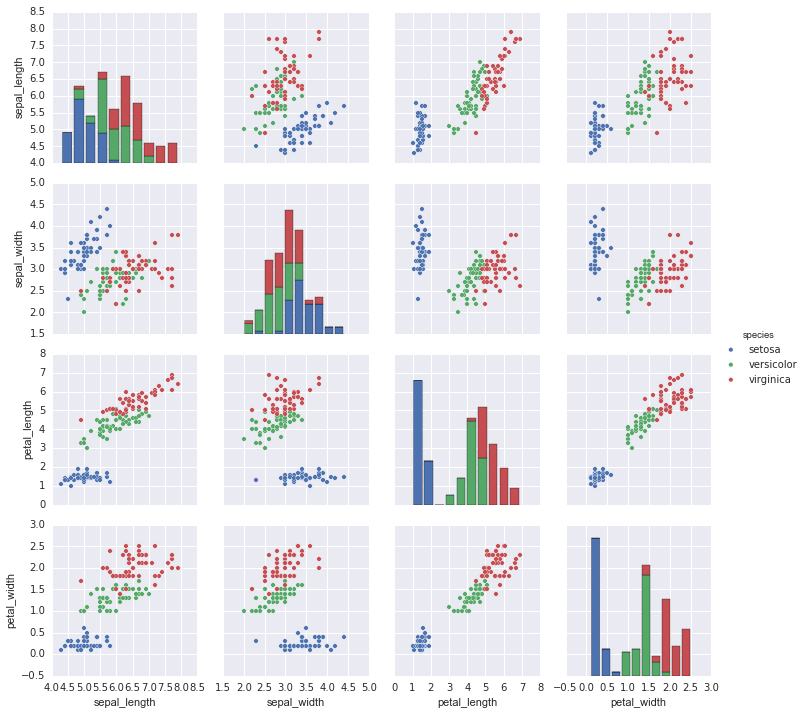

In [44]:
import seaborn as sns
sns.set()

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

## Interactive Data Exploration with PivotTable.js

(Shameless plug: I am the author of PivotTable.js and the `pivottablejs` Python module)

In [45]:
import pandas as pd
df = pd.read_csv("mps.csv")
df.head()

,Name,Party,Province,Age,Gender
0,"Liu, Laurin",NDP,Quebec,22,Female
1,"Mourani, Maria",Bloc Quebecois,Quebec,43,Female
2,"Sellah, Djaouida",NDP,Quebec,NaN,Female
3,"St-Denis, Lise",NDP,Quebec,72,Female
4,"Fry, Hedy",Liberal,British Columbia,71,Female


In [46]:
df.pivot_table(index="Party", columns="Province", aggfunc=len, values="Name")

Province,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Territories
Party,,,,,,,,,,,
Bloc Quebecois,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
Conservative,27,21,11,8,1,4,73,1,5,13,2
Green,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liberal,NaN,2,1,1,4,4,11,3,7,1,NaN
NDP,1,12,2,1,2,3,22,NaN,59,NaN,1


In [47]:
from pivottablejs import pivot_ui
pivot_ui(df)

## Making diagrams with Graphviz

In [48]:
%load_ext hierarchymagic

The hierarchymagic extension is already loaded. To reload it, use:
  %reload_ext hierarchymagic


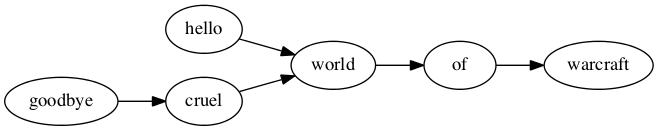

In [49]:
%%dot 

digraph G { 
    rankdir=LR;
    hello -> world;
    goodbye -> cruel -> world;
    world -> of -> warcraft;
}


## Interactive forms

In [50]:
from ipywidgets import interact

@interact
def echo(input="Hello, world!", times=[1,5,1]):
    return (input+" ")*times

u'Hello, world! Hello, world! Hello, world! '

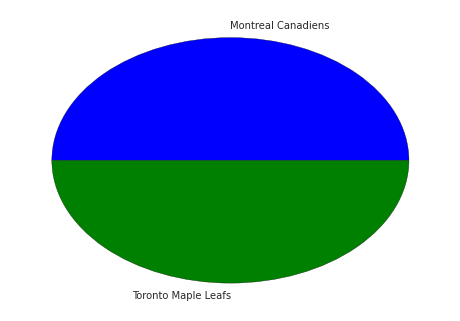

None

In [51]:
import matplotlib.pyplot as plt

@interact
def polynomial(split=[0,100]):
    plt.pie([split/100.0, 1.0-split/100.0], labels=["Montreal Canadiens", "Toronto Maple Leafs"])
    plt.show()

<br/><br/><br/><br/><br/>

## So let's make our own extension!

Here I'll switch to Jupyter's built-in text editor. Oh yeah, Jupyter has a built-in text editor! And a web-based terminal. (Yes, this is a giant security hole :)

In [52]:
%load_ext sample_ext

The sample_ext extension is already loaded. To reload it, use:
  %reload_ext sample_ext


In [53]:
%http blah blah

blah blah


<br/><br/><br/><br/><br/>

## One more thing...

Any notebook can be served up as a slide deck!

`jupyter nbconvert jupyter_magic.ipynb --to slides --post serve`

Notebooks can also be shared really easily, for example this one is available at

## http://github.com/nicolaskruchten/pyconca

<br/><br/><br/><br/><br/>

![Contact](http://nicolas.kruchten.com/contact.png)